In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv('../web_app/morbid_final.csv')

In [58]:
df['OutpatientAnnualDeductibleAmt'].value_counts()

0    476932
1     81279
Name: OutpatientAnnualDeductibleAmt, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   CID                               558211 non-null  object
 1   BID                               558211 non-null  object
 2   AmtReimbursed                     558211 non-null  int64 
 3   DeductibleAmt                     558211 non-null  int64 
 4   Is_inpatient                      558211 non-null  int64 
 5   Gender                            558211 non-null  int64 
 6   Race                              558211 non-null  int64 
 7   RenalDisease                      558211 non-null  int64 
 8   State                             558211 non-null  int64 
 9   County                            558211 non-null  int64 
 10  InpatientAnnualReimbursementAmt   558211 non-null  int64 
 11  InpatientAnnualDeductibleAmt      558211 non-null  int64 
 12  Ou

In [82]:
## lazy data cleaning
df_lazy = df.drop(['Reimbursed_Level', 'NumOfClaimDays', 'CID','BID'], axis=1)

In [49]:
## lazy fit w/o feature selection
## continuous
from sklearn.model_selection import train_test_split 

X_train_lazy, X_test_lazy, Y_train_lazy, Y_test_lazy = train_test_split(df_lazy.drop(['lof'], axis=1),
                                                                        df_lazy[['lof']],
                                                                        test_size=0.3,
                                                                        random_state=123)

In [50]:
import xgboost as xgb

D_train_lazy = xgb.DMatrix(X_train_lazy, label=Y_train_lazy)
D_test_lazy = xgb.DMatrix(X_test_lazy, label=Y_test_lazy)

In [51]:
param = {'eta':0.3, 'max_depth':3, 
         'objective':'reg:squarederror',
        'gamma':0.1}

steps = 50

In [52]:
model_1 = xgb.train(param, D_train_lazy, steps)
preds_1 = model_1.predict(D_test_lazy)

In [53]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test_lazy, preds_1))
print("RMSE: %f" % (rmse))

RMSE: 0.207153


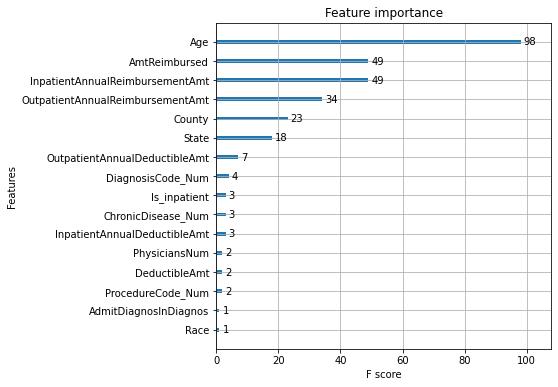

In [54]:
xgb.plot_importance(model_1)
plt.rcParams['figure.figsize'] = [6, 6]
plt.show()

In [55]:
preds_1

array([ 0.11722085, -1.0010037 , -1.0055624 , ..., -1.0015649 ,
       -0.99971795,  0.14505738], dtype=float32)

In [59]:
import joblib

joblib.dump(model_1, 'lazy_model_1.pkl')

['lazy_model_1.pkl']

In [60]:
x=0.23

In [72]:
def pred_convert(x):
    return np.round((x+1)/2,3)*100

In [80]:
df.columns

Index(['CID', 'BID', 'AmtReimbursed', 'DeductibleAmt', 'Is_inpatient',
       'Gender', 'Race', 'RenalDisease', 'State', 'County',
       'InpatientAnnualReimbursementAmt', 'InpatientAnnualDeductibleAmt',
       'OutpatientAnnualReimbursementAmt', 'OutpatientAnnualDeductibleAmt',
       'NumOfClaimDays', 'Age', 'DiagnosisCode_Num', 'ProcedureCode_Num',
       'ChronicDisease_Num', 'PhysiciansNum', 'AdmitDiagnosInDiagnos',
       'FullYearPlanA', 'FullYearPlanB', 'Is_Dead', 'lof', 'Reimbursed_Level',
       'Chronic_Alzheimer', 'Chronic_Heartfailure', 'Chronic_KidneyDisease',
       'Chronic_Cancer', 'Chronic_ObstrPulmonary', 'Chronic_Depression',
       'Chronic_Diabetes', 'Chronic_IschemicHeart', 'Chronic_Osteoporasis',
       'Chronic_rheumatoidarthritis', 'Chronic_stroke'],
      dtype='object')

In [84]:
df_new = df_lazy.drop(['Chronic_Alzheimer', 'Chronic_Heartfailure', 'Chronic_KidneyDisease',
       'Chronic_Cancer', 'Chronic_ObstrPulmonary', 'Chronic_Depression',
       'Chronic_Diabetes', 'Chronic_IschemicHeart', 'Chronic_Osteoporasis',
       'Chronic_rheumatoidarthritis', 'Chronic_stroke',
                 'InpatientAnnualReimbursementAmt','OutpatientAnnualReimbursementAmt','Race'], axis=1)

In [86]:
df_new.columns

Index(['AmtReimbursed', 'DeductibleAmt', 'Is_inpatient', 'Gender',
       'RenalDisease', 'State', 'County', 'InpatientAnnualDeductibleAmt',
       'OutpatientAnnualDeductibleAmt', 'Age', 'DiagnosisCode_Num',
       'ProcedureCode_Num', 'ChronicDisease_Num', 'PhysiciansNum',
       'AdmitDiagnosInDiagnos', 'FullYearPlanA', 'FullYearPlanB', 'Is_Dead',
       'lof'],
      dtype='object')

In [92]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   AmtReimbursed                  558211 non-null  int64
 1   DeductibleAmt                  558211 non-null  int64
 2   Is_inpatient                   558211 non-null  int64
 3   Gender                         558211 non-null  int64
 4   RenalDisease                   558211 non-null  int64
 5   State                          558211 non-null  int64
 6   County                         558211 non-null  int64
 7   InpatientAnnualDeductibleAmt   558211 non-null  int64
 8   OutpatientAnnualDeductibleAmt  558211 non-null  int64
 9   Age                            558211 non-null  int64
 10  DiagnosisCode_Num              558211 non-null  int64
 11  ProcedureCode_Num              558211 non-null  int64
 12  ChronicDisease_Num             558211 non-null  int64
 13 

In [88]:
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(df_new.drop(['lof'], axis=1),
                                                                        df_new[['lof']],
                                                                        test_size=0.3,
                                                                        random_state=123)


D_train_new = xgb.DMatrix(X_train_new, label=Y_train_new)
D_test_new = xgb.DMatrix(X_test_new, label=Y_test_new)

param = {'eta':0.25, 'max_depth':3, 
         'objective':'reg:squarederror',
        'gamma':0.1}

steps = 50

In [89]:
model_2 = xgb.train(param, D_train_new, steps)
preds_2 = model_2.predict(D_test_new)

In [90]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test_new, preds_2))
print("RMSE: %f" % (rmse))

RMSE: 0.207906


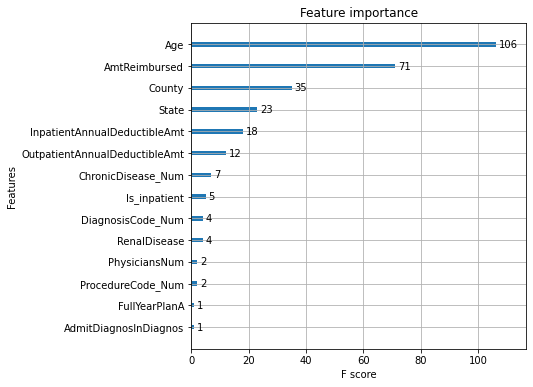

In [91]:
xgb.plot_importance(model_2)
plt.rcParams['figure.figsize'] = [6, 6]
plt.show()

In [93]:
preds_2[0]

0.1181933

In [94]:
joblib.dump(model_2,'final.pkl')

['final.pkl']

In [96]:
D_test_new

In [112]:
D_test_new.slice([1])

In [113]:
X_train_new

,AmtReimbursed,DeductibleAmt,Is_inpatient,Gender,RenalDisease,State,County,InpatientAnnualDeductibleAmt,OutpatientAnnualDeductibleAmt,Age,DiagnosisCode_Num,ProcedureCode_Num,ChronicDisease_Num,PhysiciansNum,AdmitDiagnosInDiagnos,FullYearPlanA,FullYearPlanB,Is_Dead
364824,60,0,0,1,0,25,40,1,0,0,1,0,4,1,False,True,True,False
274943,4000,1,1,1,0,49,360,1,0,0,6,1,8,2,False,True,True,False
499430,80,0,0,1,0,51,430,0,0,0,1,0,10,1,False,True,True,False
400322,50,0,0,1,0,6,200,0,0,0,2,0,10,1,False,True,True,False
382595,1400,0,0,2,0,51,480,0,0,0,3,0,10,2,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194278,20,0,0,2,1,1,620,1,1,67,5,0,8,2,False,True,True,False
192476,90,0,0,2,0,14,660,0,0,87,8,0,4,2,False,True,True,False
17730,6000,1,1,2,0,36,310,1,0,69,10,1,8,2,False,True,True,False
28030,40,1,0,1,1,49,720,0,0,76,3,0,8,1,False,True,True,False


In [114]:
model_2.predict(xgb.DMatrix(X_train_new[0]))

KeyError: 0

In [128]:
model_2.predict(xgb.DMatrix(X[0]))

ValueError: ('Expecting 2 dimensional numpy.ndarray, got: ', (18,))

In [126]:
X = np.array(X_train_new)

In [130]:
X[0]

array([60, 0, 0, 1, 0, 25, 40, 1, 0, 0, 1, 0, 4, 1, False, True, True,
       False], dtype=object)

In [123]:
X_train_new[:1].to_dict()

{'AmtReimbursed': {364824: 60},
 'DeductibleAmt': {364824: 0},
 'Is_inpatient': {364824: 0},
 'Gender': {364824: 1},
 'RenalDisease': {364824: 0},
 'State': {364824: 25},
 'County': {364824: 40},
 'InpatientAnnualDeductibleAmt': {364824: 1},
 'OutpatientAnnualDeductibleAmt': {364824: 0},
 'Age': {364824: 0},
 'DiagnosisCode_Num': {364824: 1},
 'ProcedureCode_Num': {364824: 0},
 'ChronicDisease_Num': {364824: 4},
 'PhysiciansNum': {364824: 1},
 'AdmitDiagnosInDiagnos': {364824: False},
 'FullYearPlanA': {364824: True},
 'FullYearPlanB': {364824: True},
 'Is_Dead': {364824: False}}

In [131]:
df['lof'].value_counts(normalize=True)

-1    0.618789
 0    0.329739
 1    0.051472
Name: lof, dtype: float64

In [132]:
0.329739 + 0.051472

0.381211